#   Practica 3

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt


## 1.

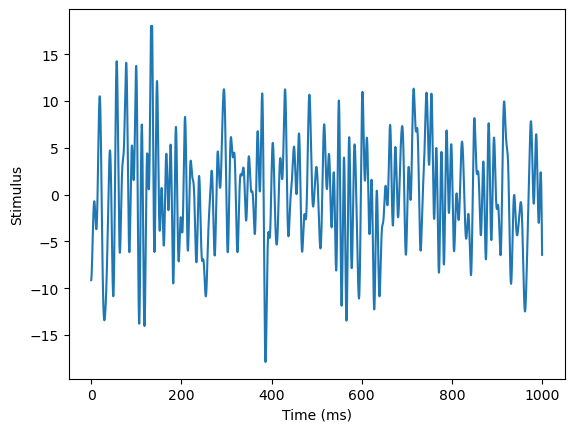

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [15]:
#open .dat file stimulus.dat and save it in a np.array 
stimulus = np.loadtxt('stimulus.dat')
t_stimulus = stimulus[:,0]
stimulus = stimulus[:,1]

plt.plot(t_stimulus, stimulus)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus')

plt.show()


The coefficient of variation is: 0.6649888944150584
The mean of the interspike intervals is: 84.69324533638628
The standard deviation of the interspike intervals is: 56.320067580666816
14849


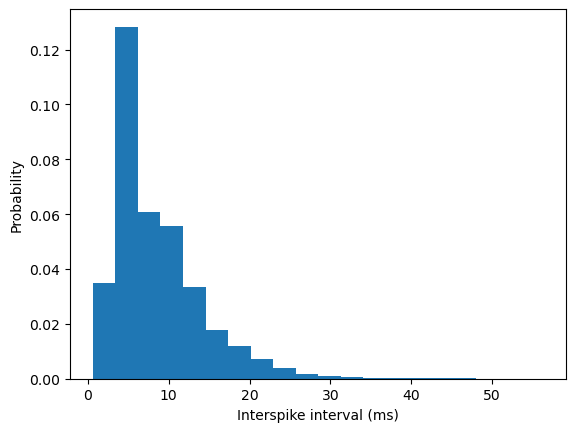

Text(0, 0.5, 'Spike train')

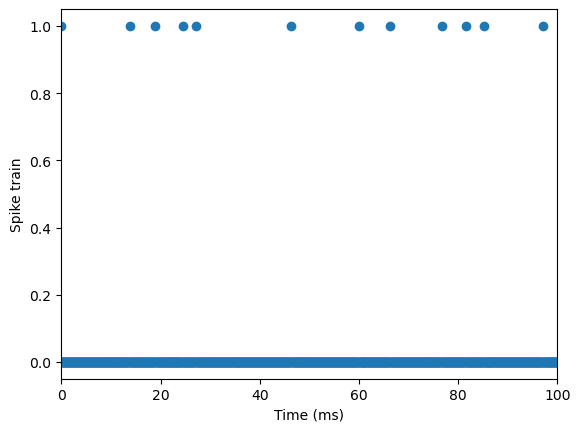

In [25]:
spikes = np.loadtxt('spikes.dat') #128 lines, each line is a realization of the spike train
dt = 0.1 #ms
def ISI(spikes):
    #compute the interspike intervals (ISI) histogram
    ISI = []
    n = 0 
    for i in range(len(spikes)-1):
        if spikes[i+1] == 1:
            ISI.append(n)
            n = 0
        else:
            n += 1
    ISI = np.array(ISI)
    return ISI

ISI_tot = np.array([])
for i in range(128):
    ISI_tot = np.concatenate((ISI_tot, ISI(spikes[i,:])))

plt.hist(ISI_tot*dt, bins = 20, density = True)
plt.xlabel('Interspike interval (ms)')
plt.ylabel('Probability')


cv = np.std(ISI_tot)/np.mean(ISI_tot)
print('The coefficient of variation is:', cv)

print('The mean of the interspike intervals is:', np.mean(ISI_tot))
print('The standard deviation of the interspike intervals is:', np.std(ISI_tot))
print(len(ISI_tot))

plt.show()

plt.plot(np.linspace(0,1000,10000), spikes[0,:], marker = 'o', linestyle = 'None')
plt.xlim(0,100)
plt.xlabel('Time (ms)')
plt.ylabel('Spike train')


## 2.

The Fano factor is: 1.5656668349803031
coefficient of variation ^2 : 0.44221022969536167
como no son iguales, el proceso no es de tipo renewal


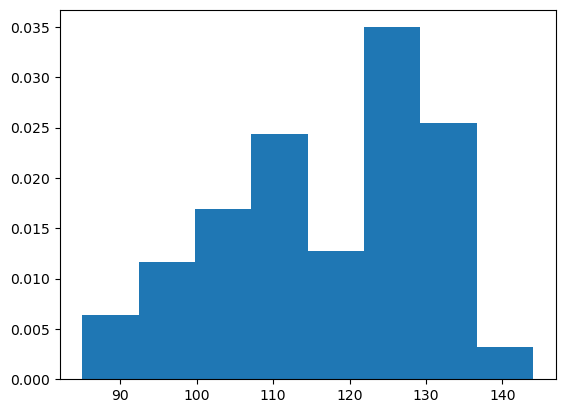

In [5]:
N = []
for i in range(128):
    N.append(np.sum(spikes[i,:]))

plt.hist(N, bins = 8, density = True)

Fano = np.var(N)/np.mean(N)
print('The Fano factor is:', Fano)
cv_2 = cv**2
print('coefficient of variation ^2 :', cv_2) 
print('como no son iguales, el proceso no es de tipo renewal')

## 3.

(100,)


Text(0, 0.5, 'Firing rate (Hz)')

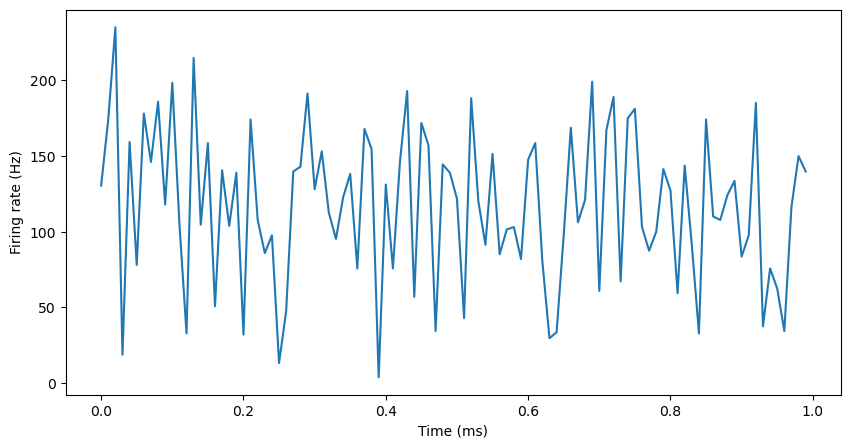

In [27]:
aux = spikes
window = 100
dt = 0.1e-3
ff = []
for sett in range(128):
    frec = []
    for i in range(len(aux[sett,:])//window):
        frec.append(np.sum(aux[sett,window*i:(i+1)*window])/(window*dt))
    ff.append(frec)

ff = np.array(ff)

f_mean = []
for i in range(len(ff[0])):
    f_mean.append(np.mean(ff[:,i]))

print(np.shape(np.array(f_mean)))
plt.figure(figsize=(10,5))
#scalar
# f_mean = (f_mean/np.max(f_mean)) * np.max(stimulus)
plt.plot(np.arange(len(f_mean))*window*dt, f_mean)
# plt.plot(t_stimulus, stimulus)
plt.xlabel('Time (ms)')
plt.ylabel('Firing rate (Hz)')

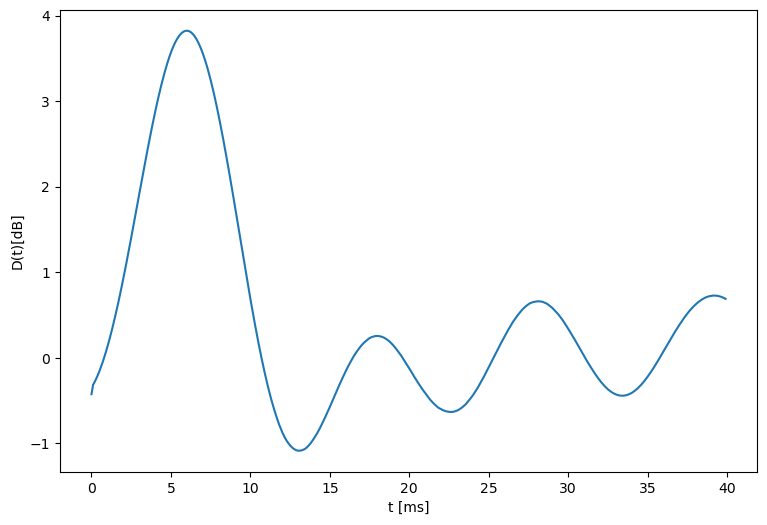

In [31]:

spikes = spikes[:,:]

cant_spikes = spikes.sum(axis=0)
total = cant_spikes.sum()

D_t = []
t = []

# Barremos tau de 0 a 100 ms
for tau in range(400):
    suma = 0
    
    for i in range(len(cant_spikes)):    # Recorremos todos los spikes
        t_previo = i - tau
        if t_previo >= 0:
            # Cant spikes * estimulo hace un tiempo tau
            suma += cant_spikes[i] * stimulus[t_previo]  # Accedemos a la columna de intensidad
  
    D_t.append(suma / total)
    t.append(tau / 10)

D_t = np.array(D_t)
t = np.array(t)

plt.figure(figsize=(9,6))
plt.plot(t, D_t)
plt.xlabel('t [ms]')
plt.ylabel('D(t)[dB]')
plt.show()


    





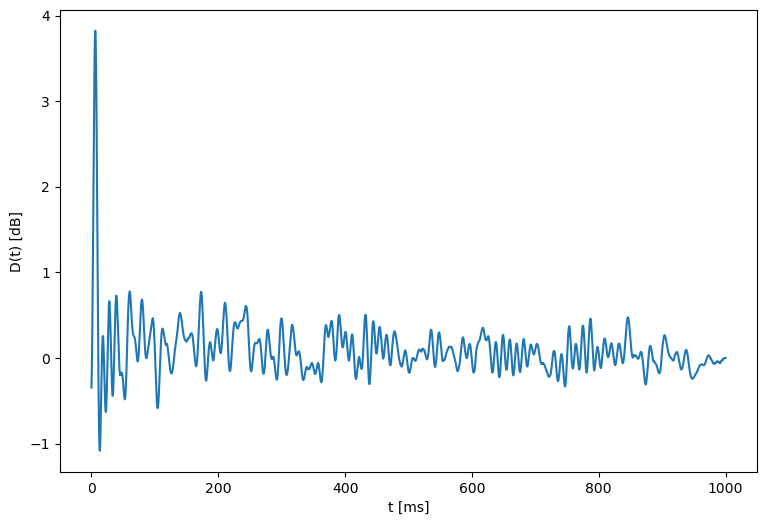

In [32]:

spikes_copy = np.copy(spikes)
cant_spikes = spikes_copy.sum(axis=0) # Calculamos la cantidad total de spikes en cada columna (en el tiempo)


total_spikes = cant_spikes.sum() # Sumamos todos los spikes para obtener el total general

D_t = []       # Lista para almacenar los valores de D(t)
t_values = []  # Lista para almacenar los valores de tau en milisegundos

# Recorremos los valores de tau (desplazamientos temporales) de 0 a 10000, que representa de 0 a 100 ms
for tau in range(10000):
    suma_total = 0  # Variable para acumular la suma ponderada por el estímulo en t_previo
    
    # Recorremos todos los spikes en el tiempo
    for i, spike_count in enumerate(cant_spikes):
        t_previo = i - tau  # Calculamos el tiempo desplazado hacia atrás en tau ms
        if t_previo > 0:   # Solo consideramos tiempos válidos (no negativos)
            suma_total += spike_count * stimulus[t_previo]  # Accedemos a la intensidad del estímulo en t_previo
    
    D_t.append(suma_total / total_spikes)# Calculamos D(t) dividiendo la suma ponderada por el total de spikes
    # Guardamos el valor de tau convertido a milisegundos
    t_values.append(tau / 10)

D_t = np.array(D_t)
t_values = np.array(t_values)


plt.figure(figsize=(9,6))
plt.plot(t_values, D_t)
plt.xlabel('t [ms]')     
plt.ylabel('D(t) [dB]')  
plt.show()


(0.0, 15.0)

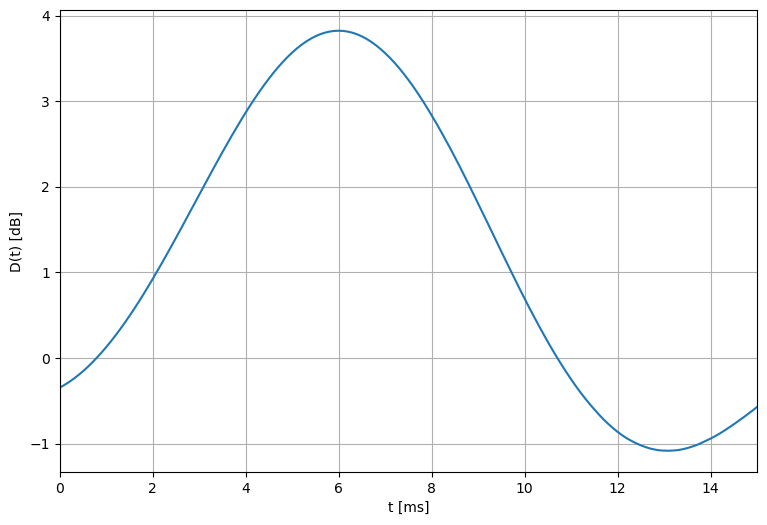

In [44]:
plt.figure(figsize=(9,6))
plt.plot(t_values, D_t)
plt.xlabel('t [ms]')     
plt.ylabel('D(t) [dB]')  
plt.grid()
plt.xlim(0,15)